# Monty Hall

La paradoja de Monty Hall es representada por la siguiente situación:

En un concurso, una persona tiene tres puertas para elegir, de las cuales una contiene un auto. Luego de elegir la primer puerta, y que detrás no se encuentre el auto, al participante se le da la opción de cambiar de respuesta.
La pregunta es: ¿Es igual la probabilidad de que el auto se encuentre atrás de la puerta que elgió en primer lugar que si cambia de puerta?

Durante este trabajo, se demostrará de manera empírica los resultados de la prueba.

In [ ]:
# Import libraries

import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define variables

# Count variables
win_first_attempt = 0
win_changing_door = 0
random_win = 0

# Acumulative counts
win_first_attempt_count = []
win_changing_door_count = []
random_win_count = []

# Number of iterations
iterations = 100000

In [ ]:
for n in range(iterations):

  doors = [0, 1, 2]
  car_door = random.choice(doors)
  chosen_door = random.choice(doors)
  doors.remove(chosen_door)

  if chosen_door == car_door:
    win_first_attempt += 1 # Won without changing door
    next_door = random.choice(doors)

  else:
    doors.remove(car_door)
    next_door = random.choice(doors) # Only one door left
  
  resting_doors = [0, 1, 2]
  resting_doors.remove(next_door)

  # Choose a new door
  new_door = random.choice(resting_doors)

  if new_door == car_door:
    random_win += 1 # Random selection between doors left

  resting_doors.remove(chosen_door)
  new_door = resting_doors[0]

  if new_door == car_door:
    win_changing_door +=1 # Won changing door

  win_first_attempt_count.append(win_first_attempt) 
  win_changing_door_count.append(win_changing_door)
  random_win_count.append(random_win)

In [ ]:
win_first_attempt, win_changing_door, random_win

(33410, 66590, 49994)

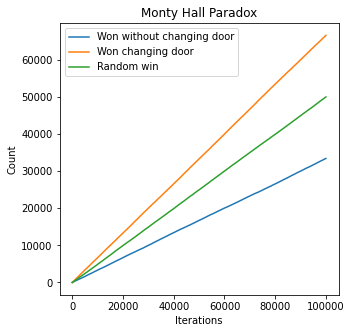

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(win_first_attempt_count, label='Won without changing door')
plt.plot(win_changing_door_count, label='Won changing door')
plt.plot(random_win_count, label = 'Random win')
plt.xlabel('Iterations')
plt.ylabel('Count')
plt.title('Monty Hall Paradox')
plt.legend()
plt.show()

## Martingala

Dentro de las ténicas más conocidas dentro del mundo de los juegos de azar se conoce la "Martingala". Se aplica a juegos del tipo "cara-seca", acá vamos a hacer una simulación jugando color en la ruleta. La estrategia consiste en lo siguiente:
* Apuesto una cantidad inicial de fichas a un color en la ruleta
* Si no sale el color seleccionado, apuesto el doble de las fichas apostadas en la mano anterior nuevamente en ese color
* Repito el paso anterior hassta que salga el color seleccionado. En ese momento, recupero todas las fichas que perdí en manos anteriores y gano una cantidad de fichas igual a la apuesta inicial.
* Cambio de color
* Repito pasos anteriores

La intención de esta simulación es determinar si necesitamos un mínimo de fichas iniciales para asegurar una victoria.
Preguntas que surgen a partir de este problema son:
* ¿Cuántas manos puedo jugar a la ruleta antes de perder todo mi capital?
* ¿Existe algún tipo de umbral mínimo que asegure el éxito?

### Hipótesis

Dado que existen 36 números (18 de cada color) y el 0(no tiene color), la probabilidad de elegir el color correcto es ligeramente menor al 50%. Por eso, la hipótesis será que posiblemente perdamos más de lo que ganemos.

In [ ]:
# Defino números para la ruleta
numeros = np.arange(37)

In [ ]:
# Negro
negro = [15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26]
# Rojo
rojo = [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3]

In [ ]:
def martin_gala(color: str, fichas: int, apuesta_inicial: int, cantidad_tiros: int) -> list:
  colores = ['negro', 'rojo']
  counter = 0
  apuesta_actual = apuesta_inicial

  registro_tiros = [] # Registro de números que salieron
  registro_apuesta = [] # Registro de apuesta en cada tiro
  registro_fichas = [] # Cantidad de fichas que tiene el jugador en cada tiro

  # Continuamos tirando mientras las fichas sean mayores a 0 y a la apueesta actual
  while (counter < cantidad_tiros) & (fichas >= apuesta_actual):
  
    tiro = random.choice(numeros)

    # Si nos sale el mismo color, cambiamos
    if tiro in globals()[color]:
      fichas = fichas + apuesta_actual # Ganamos la apuesta actual
      apuesta_actual = apuesta_inicial # Volvemos a la apuesta inicial
      color = [x for x in colores if x != color][0] # Cambiamos de color
    # Sino, seguimos y duplicamos apuesta
    else:
      fichas = fichas - apuesta_actual
      apuesta_actual = apuesta_actual * 2
    
    counter += 1
    registro_tiros.append(tiro)
    registro_fichas.append(fichas)
    registro_apuesta.append(apuesta_actual)
  return registro_tiros, registro_fichas, registro_apuesta

### Estudiamos algunos casos

A continuación, graficamos algunos casos utilizando un capital inicial de $10000, con una apuesta inicial de $500 y un máximo de juegos de 500.

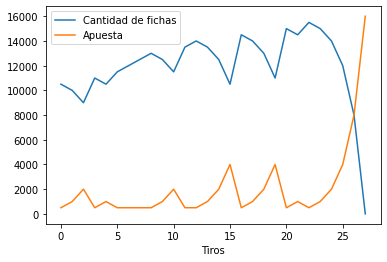

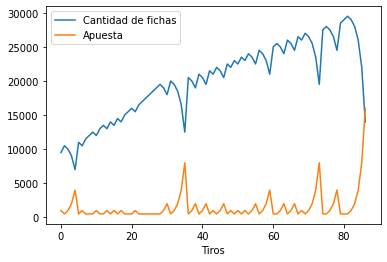

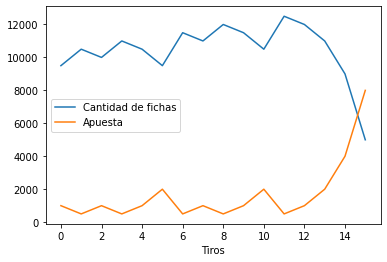

In [ ]:
random.seed(25) # Establecemos una semilla para poder reproducir los resultados

for i in range(3):  
  tiros, fichas, apuestas = martin_gala('negro', 10000, 500, 100)
  plt.plot(fichas, label = 'Cantidad de fichas')
  plt.plot(apuestas, label = 'Apuesta')
  plt.xlabel('Tiros')
  plt.legend()
  plt.show()

### Observaciones

Vemos que con este capital inicial y cantidad de fichas en la apuest ainicial, de 3 juegos, perdimos los 3.

### Iniciamos la simulación

A continuación, plantearemos 2500 juegos con una apuesta inicial igual a la anterior, pero con un capital inicial de $100000 y un máximo de 100 tiros, a ver si con esto mejora nuestro rendimiento y podemos llegar al final del juego.

In [ ]:
# Listas para agregados datos históricos
historico_tiros = []
historico_max_fichas = []
# Definimos variables
cantidad_de_juegos = 2500
color_inicial = 'negro'
apuesta_inicial = 500
dinero_inicial = 100000
cantidad_de_tiros = 100

random.seed(25) # Establecemos una semilla para poder reproducir los resultados

for i in range(cantidad_de_juegos):
  tiros, fichas, apuestas = martin_gala(color_inicial, dinero_inicial, apuesta_inicial, cantidad_de_tiros)
  cant_tiros = len(tiros) # Cantidad de tiros que realizó el jugador
  max_fichas = max(fichas) # Máxima cantidad defichas que acumuló el jugador
  historico_tiros.append(cant_tiros)
  historico_max_fichas.append(max_fichas)

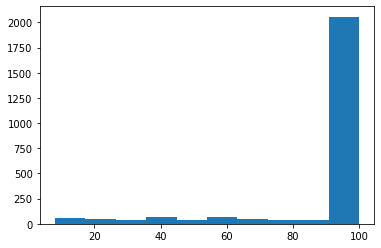

In [ ]:
plt.hist(historico_tiros)
plt.show()

In [ ]:
historico_juegos_ganados = ['Perdió' if x < 100 else 'Ganó' for x in historico_tiros ]
juegos_perdidos = historico_juegos_ganados.count('Perdió')
juegos_ganados = historico_juegos_ganados.count('Ganó')

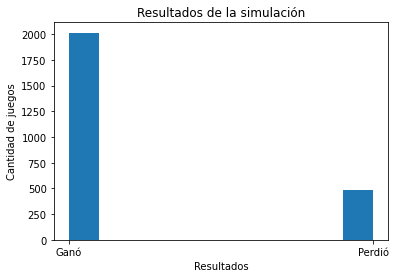

Se ganaron 2014. Representa un 80.56% del total. 
Se perdieron 486. Representa un 19.439999999999998% del total.


In [ ]:
plt.hist(historico_juegos_ganados)
plt.xlabel('Resultados')
plt.ylabel('Cantidad de juegos')
plt.title('Resultados de la simulación')
plt.show()
print(f'Se ganaron {juegos_ganados}. Representa un {juegos_ganados / cantidad_de_juegos * 100}% del total. \nSe perdieron {juegos_perdidos}. Representa un {juegos_perdidos / cantidad_de_juegos * 100}% del total.')

En definitiva, lo único que resulta importante es la cantidad de veces seguidas que puede no salir el color.

\begin{align}
        A_n = 2^{n - 1}.A_0
    \end{align}

$A_n$ es la apuesta después de $n jugadas perdidas seguidas, y $A_0$ es la apuesta inicial.

\begin{align}
        T_n \ge T_0 - \sum_{i=1}^ n A_i
    \end{align}

$T_n$ es el dinero total después de n jugadas perdidas seguidas, y $T_0$ es el total inicial.

La expresión qhe las combina:

\begin{align}
        T_n \ge T_0 - \sum_{i=1}^ n 2^{i - 1}.A_0
    \end{align}

In [ ]:
inicial = 100000
apuesta = 500
count = 0
print('''
        Bienvenido al juego donde siempre perdés!\n\n
        Está hecho para ver cuántas veces seguidas podemos perder en un juegon
        teniendo en cuenta la regla Martingala.\n\n
''')
while inicial >= apuesta:
  print(inicial, apuesta)
  n = 1 - (19 / 37) ** count
  print(f'{n}% de que salga tu color')
  print('--------------')
  inicial = inicial - apuesta
  apuesta =  apuesta * 2
  count += 1
else:
  print(inicial, apuesta)

  print(f'Te quedaste sin plata después de {count} intentos!\nTe faltan ${apuesta - inicial}.\n')


        Bienvenido al juego donde siempre perdés!


        Está hecho para ver cuántas veces seguidas podemos perder en un juegon
        teniendo en cuenta la regla Martingala.



100000 500
0.0% de que salga tu color
--------------
99500 1000
0.4864864864864865% de que salga tu color
--------------
98500 2000
0.7363038714390067% de que salga tu color
--------------
96500 4000
0.8645884745227331% de que salga tu color
--------------
92500 8000
0.9304643517819441% de que salga tu color
--------------
84500 16000
0.9642925049691065% de que salga tu color
--------------
68500 32000
0.9816637187679195% de que salga tu color
--------------
36500 64000
Te quedaste sin plata después de 7 intentos!
Te faltan $27500.



In [ ]:
# Listas para agregados datos históricos
historico_tiros = []
historico_max_fichas = []
# Definimos variables
cantidad_de_juegos = 5000
color_inicial = 'negro'
apuesta_inicial = 500
dinero_inicial = 100000
cantidad_de_tiros = 1000

random.seed(25) # Establecemos una semilla para poder reproducir los resultados

for i in range(cantidad_de_juegos):
  tiros, fichas, apuestas = martin_gala(color_inicial, dinero_inicial, apuesta_inicial, cantidad_de_tiros)
  cant_tiros = len(tiros) # Cantidad de tiros que realizó el jugador
  max_fichas = max(fichas) # Máxima cantidad defichas que acumuló el jugador
  historico_tiros.append(cant_tiros)
  historico_max_fichas.append(max_fichas)

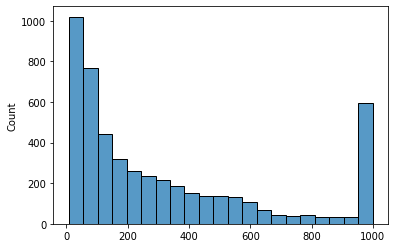

In [ ]:
import seaborn as sns

sns.histplot(historico_tiros)
plt.show()